# Combine multiple protein and peptide annotations to create a single annotation for Cytoscape - March 31, 2017

Use the Wolf-Yadlin lab input data and TPS output.  Reproduce the earlier verison of the network figure to assess that the sytle file generation is working.

## Set up file locations

In [1]:
% pylab inline
%cd ../python

import os
import EGFRUtil
import pandas as pd

baseDir = os.path.join('..','..')
tps_in_dir = os.path.join(baseDir, 'src', 'tps', 'data', 'timeseries')
tps_out_dir = os.path.join(baseDir, 'htcondor_results', 'results_reproduce_egfr_tps_033117')

# Use the version with the header line
pepMapFile = os.path.join(tps_in_dir, 'peptide-mapping.tsv')
pepFirstFile = os.path.join(tps_in_dir, 'p-values-first.tsv')
pepPrevFile = os.path.join(tps_in_dir, 'p-values-prev.tsv')

# Use the version for which log2 fold change has been precomputed
timeSeriesFile = os.path.join('..', '..', 'synthesis072614', 'log2FoldChange011215.txt')

windowsFile = os.path.join(tps_out_dir, 'activity-windows.tsv')
networkFile = os.path.join(tps_out_dir, 'output.sif')

# Use the same EGFR gold standard for Olsen 2006 and Ale's data
goldStandardFile = os.path.join(baseDir, 'evaluation', '2014-10-03', 'eight-egfr-reference-all.txt')

styleTemplateFile = os.path.join(baseDir, 'src', 'tps', 'local', 'visualization', 'tps_style_template.xml')

out_dir = os.path.join(baseDir, 'evaluation', '2017-03-31-wolf-yadlin-TPS-cytoscape')
if not os.path.exists(out_dir):
    os.makedirs(out_dir)
    print('Created {}'.format(out_dir))
outFile = os.path.join(out_dir, 'wolf-yadlin-cytoscape-annotations-03317.txt')
outStyleFile = os.path.join(out_dir, 'tps_style.xml')

Populating the interactive namespace from numpy and matplotlib
C:\Users\agitter\Desktop\postdocToSave\egfr\src\python
Created ..\..\evaluation\2017-03-31-wolf-yadlin-TPS-cytoscape


## Call the function to load the temporal and EGFR gold standard annotations and merge them into a Cytoscape-readable format
Add a 0 to the beginning of every time series

In [2]:
pvalThresh = 0.01 # Same threhsold used in TPS
logTransform = False
pepsPerProt = EGFRUtil.PrepTemporalCytoscapeTPS(pepMapFile, timeSeriesFile, pepFirstFile,
                             pepPrevFile, windowsFile, networkFile,
                             goldStandardFile, pvalThresh, logTransform, styleTemplateFile,
                             outFile, outStyleFile, addZero = True) # don't provide logDefault

Loaded protein id map for 2917 peptides
Loaded 1068 peptides and 7 scores in the first and previous score files
Loaded prizes for 1068 peptides
263 peptides with significant prizes (>= 2)
Loaded time series for 701 proteins (and pseudonodes)
Added 0 to the start of every time series
Min value in time series: -2.622233
Max value in time series: 5.646644
Mean peptides per protein: 1.523538
Max peptides per protein: 12
Max significant peptides per protein: 6
Max insignificant peptides per protein: 10
Loaded activity windows for 316 proteins
Loaded 324 gold standard reference pathway proteins
Loaded 311 proteins on the synthesized pathway
Wrote attributes for 38 Steiner nodes in the TPS pathway
Wrote attributes for 168 prize nodes in the TPS pathway with a significant peptide
Wrote attributes for 105 prize nodes in the TPS pathway with no significant peptides
Wrote attributes for 428 proteins excluded by PCSF or TPS


## Plot the number of peptides per protein

492 proteins with 1 peptide(s)
135 proteins with 2 peptide(s)
37 proteins with 3 peptide(s)
18 proteins with 4 peptide(s)
10 proteins with 5 peptide(s)
4 proteins with 6 peptide(s)
0 proteins with 7 peptide(s)
2 proteins with 8 peptide(s)
0 proteins with 9 peptide(s)
1 proteins with 10 peptide(s)
1 proteins with 11 peptide(s)
1 proteins with 12 peptide(s)


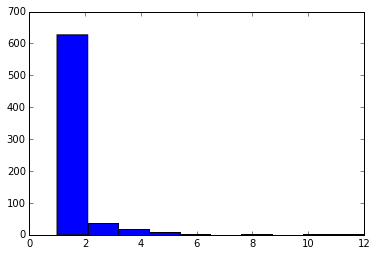

In [3]:
hist(pepsPerProt)
for count in range(1,max(pepsPerProt)+1):
    print "%d proteins with %d peptide(s)" % (sum([x == count for x in pepsPerProt]), count)

## Test parts of the Cytoscape table

In [4]:
cytoDf = pd.read_csv(outFile, sep='\t')
cytoDf.head()

,Protein,NodeType,ReferencePathway,SigPeptide1,SigPeptide2,SigPeptide3,SigPeptide4,SigPeptide5,SigPeptide6,InsigPeptide1,...,ActivitySummary32min,ActivitySummary64min,ActivitySummary128min,FirstActive,HeatMapBg1,HeatMapBg2,HeatMapBg3,HeatMapBg4,HeatMapBg5,HeatMapBg6
0,1433G_HUMAN,Steiner,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2min,"0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0"
1,1433Z_HUMAN,InsigPrize,False,NaN,NaN,NaN,NaN,NaN,NaN,"0, 0.023497, 0.027113, -0.015028, -0.119385, 0...",...,NaN,NaN,NaN,2min,"0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0"
2,41_HUMAN,SigPrize,False,"0, 0.36918, -0.088325, -0.493456, -0.706793, -...",NaN,NaN,NaN,NaN,NaN,"0, 0.525056, 0.405297, 0.060709, 0.327423, 0.3...",...,0.0,0.0,0.0,2min,"0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0"
3,4ET_HUMAN,Excluded,False,"0, 0.106206, 0.314831, 1.052917, 1.225798, 1.3...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Not active,"0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0"
4,A8K031_HUMAN,Steiner,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2min,"0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0","0, 0, 0, 0, 0, 0, 0"


In [5]:
# Verify that all TPS nodes are in the annotation file
tpsNodes = set()
with open(networkFile) as net_f:
    for line in net_f:
        parts = line.strip().split('\t')
        tpsNodes.add(parts[0])
        tpsNodes.add(parts[2])

subsetDf = cytoDf[cytoDf['NodeType'] != 'Excluded']
subsetNodes = set(subsetDf['Protein'].values)
assert tpsNodes == subsetNodes
print 'All TPS nodes are in the annotation file'

# Verify all proteins that have peptides listed in the annotation file
# are in the peptide-protein mapping.  The peptide-protein mapping
# contains proteins from any of the three replicates though, whereas the
# annotation file only contains those in all three.
prizeNodes = set()
with open(pepMapFile) as prize_f:
    # Skip the header
    prize_f.next()
    for line in prize_f:
        parts = line.strip().split('\t')
        prizeNodes.add(parts[1])
# All proteins in the annotation file with a significant or insignificant peptide
subsetNodes = set(cytoDf.loc[cytoDf['SigPeptide1'].notnull() | cytoDf['InsigPeptide1'].notnull(), 'Protein'].values)
assert len(subsetNodes) == 701
assert subsetNodes.issubset(prizeNodes)
print 'All annotation file proteins are in the peptide mapping file'

# Verify all nodes in the annotation file are from the TPS network or the prize nodes
allNodes = set()
allNodes.update(tpsNodes)
allNodes.update(prizeNodes)
subsetNodes = set(cytoDf['Protein'].values)
assert subsetNodes.issubset(allNodes)
print 'All nodes in the annotation file are from TPS or the prize nodes'

# Verify the reference pathway overlap matches what was observed previously
assert len(cytoDf[cytoDf['ReferencePathway'] & (cytoDf['NodeType'] != 'Excluded')]) == 34
print 'All nodes in the TPS pathway and EGFR reference pathways are in the annotation file'

# Verify first activity times
assert cytoDf.loc[cytoDf['Protein'] == 'DYR1B_HUMAN', 'FirstActive'].values == '128min'
assert cytoDf.loc[cytoDf['Protein'] == 'ARHG7_HUMAN', 'FirstActive'].values == '32min'
assert len(cytoDf[cytoDf['FirstActive'] == '2min']) == 189
assert len(cytoDf[cytoDf['FirstActive'] == '64min']) == 8
assert len(cytoDf[cytoDf['FirstActive'] == 'Not active']) == 428
print 'Nodes in annotation file have expected first activity time'

# Verify all excluded nodes have no first activity time
assert np.all((cytoDf['NodeType'] == 'Excluded') == (cytoDf['FirstActive'] == 'Not active'))
print 'All excluded nodes have no activity time and vice versa'

# Verify that these proteins have the expected number of significant and insignificant peptides
assert sum(cytoDf.loc[cytoDf['Protein'] == 'EGFR_HUMAN', 'SigPeptide1':'SigPeptide6'].notnull().values) == 6
assert sum(cytoDf.loc[cytoDf['Protein'] == 'EGFR_HUMAN', 'InsigPeptide1':'InsigPeptide10'].notnull().values) == 2

assert sum(cytoDf.loc[cytoDf['Protein'] == 'NUCKS_HUMAN', 'SigPeptide1':'SigPeptide6'].notnull().values) == 2
assert sum(cytoDf.loc[cytoDf['Protein'] == 'NUCKS_HUMAN', 'InsigPeptide1':'InsigPeptide10'].notnull().values) == 10

assert sum(cytoDf.loc[cytoDf['Protein'] == 'CBL_HUMAN', 'SigPeptide1':'SigPeptide6'].notnull().values) == 3
assert sum(cytoDf.loc[cytoDf['Protein'] == 'CBL_HUMAN', 'InsigPeptide1':'InsigPeptide10'].notnull().values) == 2
print 'Proteins have expected number of peptides'

def MinLogFC(row):
    fcs = []
    for timeSeries in row:
        if not str(timeSeries) == 'nan':
            fcs.extend(map(float, timeSeries.split(', ')))
    return min(fcs)

# Verify min fold change of another protein
assert np.isclose(MinLogFC(cytoDf.loc[cytoDf['Protein'] == 'GSK3A_HUMAN', 'SigPeptide1':'InsigPeptide10'].values[0]),-1.051833)
print 'Protein has expected min log2 fold change'

with open(outStyleFile) as f:
    styleContent = f.read()
    assert '$$$' not in styleContent
print 'Removed placeholders from style file'

All TPS nodes are in the annotation file
All annotation file proteins are in the peptide mapping file
All nodes in the annotation file are from TPS or the prize nodes
All nodes in the TPS pathway and EGFR reference pathways are in the annotation file
Nodes in annotation file have expected first activity time
All excluded nodes have no activity time and vice versa
Proteins have expected number of peptides
Protein has expected min log2 fold change
Removed placeholders from style file
